In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
bmi_mean = df['bmi'].mean()

In [7]:
df['bmi'].fillna(bmi_mean, inplace=True)

In [8]:
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])
df['ever_married'] = label.fit_transform(df['ever_married'])
df['work_type'] = label.fit_transform(df['work_type'])
df['Residence_type'] = label.fit_transform(df['Residence_type'])
df['smoking_status'] = label.fit_transform(df['smoking_status'])

In [9]:
gender_dummies = pd.get_dummies(df['gender'])
work_dummies = pd.get_dummies(df['work_type'])
smoking_dummies = pd.get_dummies(df['smoking_status'])

In [10]:
X = df[['age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi']].values

In [11]:
X = np.c_[X, gender_dummies.values, work_dummies.values, smoking_dummies.values]

In [12]:
y = df['stroke']

In [13]:
st = StandardScaler()
X = st.fit_transform(X)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
tree = DecisionTreeClassifier()
bagging = BaggingClassifier(tree)
bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [16]:
y_pred = bagging.predict(x_test)
accuracy_score(y_test, y_pred)

0.945226917057903

In [36]:
random_forest = RandomForestClassifier(min_samples_leaf=2)
random_forest.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2)

In [37]:
y_pred = random_forest.predict(x_test)
accuracy_score(y_test, y_pred)

0.9507042253521126

In [19]:
x_train.shape

(3832, 19)

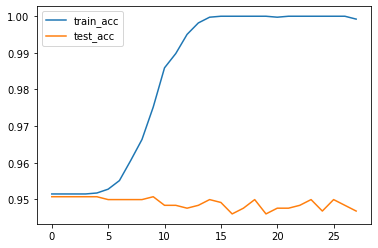

In [26]:
max_depth = [i for i in range(2,30)]

train_accuracy = []
test_accuracy = []
for max_d in max_depth:
    random_forest = RandomForestClassifier(max_depth=max_d)
    random_forest.fit(x_train, y_train)
    train_pred = random_forest.predict(x_train)
    test_pred = random_forest.predict(x_test)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
plt.plot(train_accuracy, label='train_acc')
plt.plot(test_accuracy, label='test_acc')
plt.legend()
plt.show()

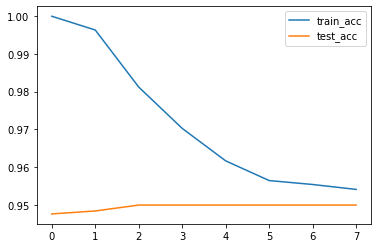

In [33]:
min_sample_split = np.arange(2,10)

train_accuracy = []
test_accuracy = []
for min_s in min_sample_split:
    random_forest = RandomForestClassifier(min_samples_split=min_s)
    random_forest.fit(x_train, y_train)
    train_pred = random_forest.predict(x_train)
    test_pred = random_forest.predict(x_test)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
plt.plot(train_accuracy, label='train_acc')
plt.plot(test_accuracy, label='test_acc')
plt.legend()
plt.show()

In [34]:
train_accuracy

[1.0,
 0.9963465553235908,
 0.9812108559498957,
 0.9702505219206681,
 0.9616388308977035,
 0.956419624217119,
 0.9553757828810021,
 0.954070981210856]

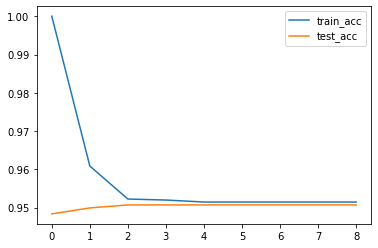

In [35]:
min_sample_leaf = np.arange(1,10)

train_accuracy = []
test_accuracy = []
for min_l in min_sample_leaf:
    random_forest = RandomForestClassifier(min_samples_leaf=min_l)
    random_forest.fit(x_train, y_train)
    train_pred = random_forest.predict(x_train)
    test_pred = random_forest.predict(x_test)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
plt.plot(train_accuracy, label='train_acc')
plt.plot(test_accuracy, label='test_acc')
plt.legend()
plt.show()

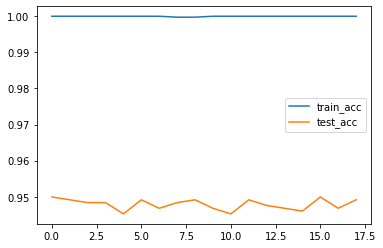

In [38]:
max_features = np.arange(1,x_train.shape[1])

train_accuracy = []
test_accuracy = []
for max_f in max_features:
    random_forest = RandomForestClassifier(max_features=max_f)
    random_forest.fit(x_train, y_train)
    train_pred = random_forest.predict(x_train)
    test_pred = random_forest.predict(x_test)
    
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    
plt.plot(train_accuracy, label='train_acc')
plt.plot(test_accuracy, label='test_acc')
plt.legend()
plt.show()